In [1]:
%matplotlib notebook
%matplotlib notebook

from matplotlib import style
style.use('ggplot')

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [2]:
# Calculates a set of x coordinate points for an ellipse
# a   - major dimension
# b   - minor dimension
# rot - ellipse rotation
# p   - number of points

def ellipseX (a,b,rot,p):
    t = np.arange(0.0, np.pi * 2,  (np.pi*2)/p)
    return a * np.cos(t) * np.cos(rot) -b * np.sin(t) * np.sin(rot)

In [3]:
# Calculates a set of y coordinate points for an ellipse
# a   - major dimension
# b   - minor dimension
# rot - ellipse rotation
# p   - number of points

def ellipseY (a,b,rot,p):
    t = np.arange(0.0, np.pi * 2, (np.pi*2)/p )
    return b * np.cos(rot) * np.sin(t) +a * np.cos(t) * np.sin(rot)



### Test Point Within Ellipse
$$ \dfrac{(x-h)^2} {a^2} + \dfrac{(y-k)^2} {b^2} \leqslant 1 $$

### Test Point Within Rotated Ellipse
$$ \dfrac{cos(\theta)(x-h) + sin(\theta)(y-k)} {a^2} + \dfrac{sin(\theta)(x-h) + cos(\theta)(y-k)} {b^2} \leqslant 1 $$

$ x $ - Point x cordinate origin
$ y $ - Point y cordinate origin
$ h $ - Ellipse x cordinate origin
$ k $ - Ellipse y cordinate origin
$ a $ - Ellipse major axis 
$ b $ - Ellipse minor axis
$ \theta $ - Ellipse rotaion

https://stackoverflow.com/questions/7946187/point-and-ellipse-rotated-position-test-algorithm


In [4]:
# Determines if a point exists within  an ellipse
# xp  - point x coordinate
# yp  - point y coordinate
# a   - major dimension
# b   - minor dimension
# rot - ellipse rotation
def pointInEllipse(xp,yp,a,b,rot):
    
    hit = ( math.pow( xp * math.cos(rot) + yp * math.sin(rot), 2)) / math.pow(a,2) +  \
          ( math.pow( xp * math.sin(rot) - yp * math.cos(rot)  , 2)) / math.pow(b,2)

    if hit <= 1:
        return True
    else:
        return False

<IPython.core.display.Javascript object>


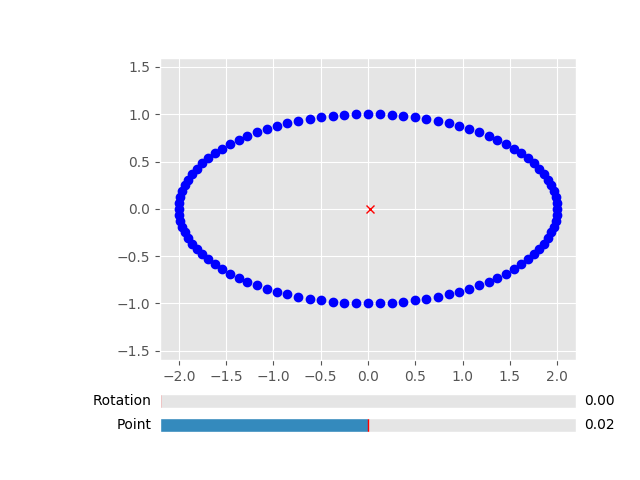

In [5]:
#Define default parameter
px = 0
py = 0
a = 2.0
b = 1.0
rot = 0


# Calculate ellipse points
x = ellipseX(a,b,rot, 100)
y = ellipseY(a,b,rot, 100)


# Setup dynamic plotting
fig, ax = plt.subplots()
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.subplots_adjust(left=0.25, bottom=0.25)
plt.axis('equal')

plt_ellipse, = plt.plot(x,y, 'ob')
plt_point, = plt.plot(px,py, 'xr')

ax_ellipse = plt.axes([0.25, 0.15, 0.65, 0.03])
s_ellipse = Slider(ax_ellipse, 'Rotation', 0, np.pi*2 , valinit=0)

ax_point = plt.axes([0.25, 0.1, 0.65, 0.03])
s_point = Slider(ax_point, 'Point', (-a * 1.5), (a * 1.5) , valinit=0)


# Interactions
def update(val):
    rot = s_ellipse.val
    px = s_point.val
    
    x = ellipseX(a,b,rot, 100)
    y = ellipseY(a,b,rot, 100)
    hit = pointInEllipse(px,py,a,b,s_ellipse.val)
    
    plt_ellipse.set_data(x,y)
    plt_point.set_xdata(px)
    
    if hit is True:
        plt_point.set_color('r')
    else:
        plt_point.set_color('g')
        
    fig.canvas.draw_idle()

# Set slider callbacks    
s_ellipse.on_changed(update)        
s_point.on_changed(update)
    
        
plt.show()
